In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

plt.style.use('ggplot')
font = {'family' : 'meiryo'}
#matplotlib.rc('font', **font)

In [12]:
import glob
from pandas.io.common import EmptyDataError

# 170301 (int型) を日付型に変換
# cf) http://qiita.com/TomokIshii/items/ff14771ac0e77632969a
date_parser = lambda date: pd.datetime.strptime(str(date), '%y%m%d')
# たまに name に ' ' が入ってるのでNaNに
df = pd.read_csv(
    '/Users/akiyoko/PycharmProjects/marketstat/downloads/boj/2016/160301.csv',
    index_col='date', parse_dates=True, date_parser=date_parser, na_values=' ')
df = df.dropna(subset=['name'])
df

,expected_value,preliminary_value,name,confirmed_value
date,,,,
2016-03-01,0.0,-100,銀行券要因,NaN
2016-03-01,-7200.0,-10000,財政等要因,NaN
2016-03-01,-7200.0,-10100,資金過不足,NaN
2016-03-01,13100.0,+12900,合計,NaN
2016-03-01,5900.0,+2800,当座預金増減,NaN
2016-03-01,NaN,2592700,当座預金残高,NaN
2016-03-01,NaN,NaN,マネタリーベース,NaN
2016-03-01,NaN,積み期間（2/16～3/15日）の所要準備額（積数）,積み期間（2/16～3/15日）の所要準備額（積数）,1917300.0
2016-03-01,NaN,積み期間（2/16～3/15日）の所要準備額（1日平均）,積み期間（2/16～3/15日）の所要準備額（1日平均）,66100.0


In [9]:
# 2016年1年分のDataFrameを用意
start_date = "2016-01-01"
end_date = "2016-12-31"

# monetary control
df_date = pd.DataFrame(index=pd.date_range(start_date, end_date))
df_mc = pd.DataFrame()
files = glob.glob('/Users/akiyoko/PycharmProjects/marketstat/downloads/boj/2016/*.csv')
for f in files:
    try:
        df = pd.read_csv(f)
    except EmptyDataError:
        continue
    date_parser = lambda date: pd.datetime.strptime(str(date), '%y%m%d')
    # たまに name に ' ' が入ってるのでNaNに
    df = pd.read_csv(f, index_col='date', parse_dates=True, date_parser=date_parser, na_values=' ')
    df = df.dropna(subset=['preliminary_value', 'name'])
    # 行を条件で抽出するためにqueryを使う cf) http://qiita.com/hik0107/items/d991cc44c2d1778bb82e
    df = df.query('name == "小計（除く資産買入等基金）"')#['preliminary_value']
    # int型でないと判定されてしまっているようなのでint型に変換
    # cf) http://sinhrks.hatenablog.com/entry/2014/12/06/233032
    df['preliminary_value'] = df['preliminary_value'].astype(int)
    df_mc = pd.concat([df_mc, df])
#df = df.loc(df.name = u'資金過不足'])
#df_mc = df_mc.dropna(subset=['preliminary_value'])
df_mc
df_mc.plot(y=['preliminary_value'])

TypeError: Empty 'DataFrame': no numeric data to plot

In [5]:
# 2016年1年分のDataFrameを用意
start_date = "2016-01-01"
end_date = "2016-12-31"
df = pd.DataFrame(index=pd.date_range(start_date, end_date))

# 日経平均のデータを読み込んでjoinする
df = df.join(pd.read_csv("n225.csv", index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]))

# 終値がない日（市場が休みの日）を取り除く
df = df.dropna()
print(df.head())

               Adj Close
2016-01-04  18450.980469
2016-01-05  18374.000000
2016-01-06  18191.320312
2016-01-07  17767.339844
2016-01-08  17697.960938


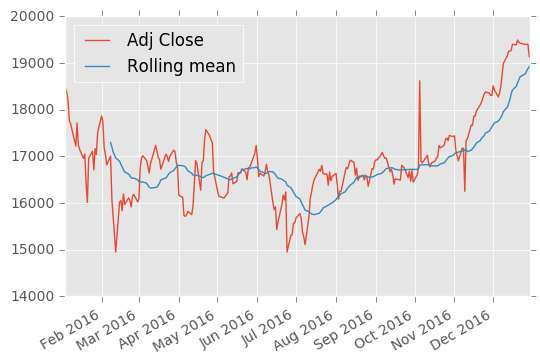

In [6]:
# 25日移動平均の計算
rm = df.rolling(window=25).mean()

# プロット
ax = df.plot()
rm.columns = ["Rolling mean"]
rm.plot(ax=ax)

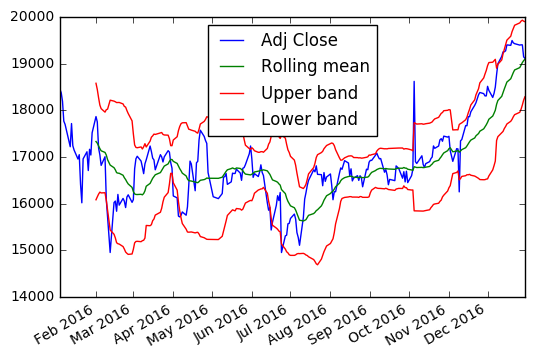

In [5]:
# ボリンジャーバンドの計算
rm = df.rolling(window=20).mean()
rstd = df.rolling(window=20).std()
upper_band = rm + rstd * 2
lower_band = rm - rstd * 2

# プロット
ax = df.plot(color="blue")
rm.columns = ["Rolling mean"]
rm.plot(ax=ax, color="green")
upper_band.columns = ["Upper band"]
upper_band.plot(ax=ax, color="red")
lower_band.columns = ["Lower band"]
lower_band.plot(ax=ax, color="red")

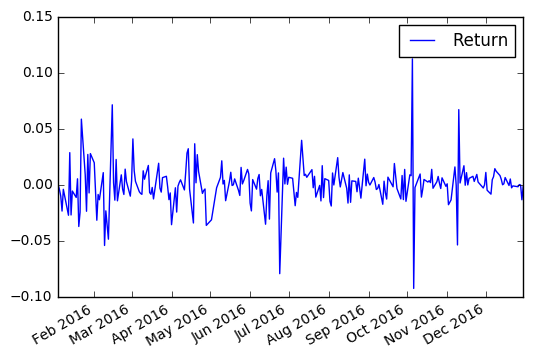

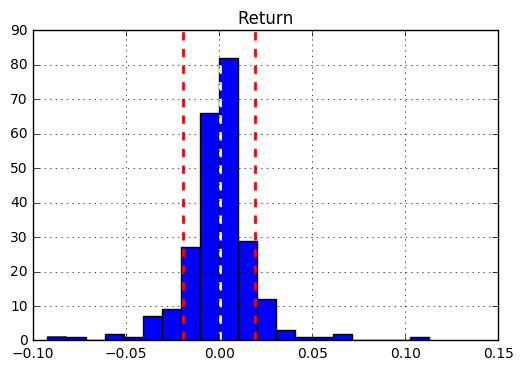

In [6]:
# 日次リターンの計算
daily_return = df / df.shift() - 1
daily_return.ix[0,0] = 0
daily_return.columns=["Return"]
daily_return.plot() # そのままプロット
daily_return.hist(bins=20) # ヒストグラム
plt.axvline(daily_return["Return"].mean(), color="w", linestyle="dashed", linewidth=2)
std = daily_return["Return"].std()
plt.axvline(std, color="r", linestyle="dashed", linewidth=2)
plt.axvline(-std, color="r", linestyle="dashed", linewidth=2)

          n225       spy
n225  1.000000  0.185885
spy   0.185885  1.000000


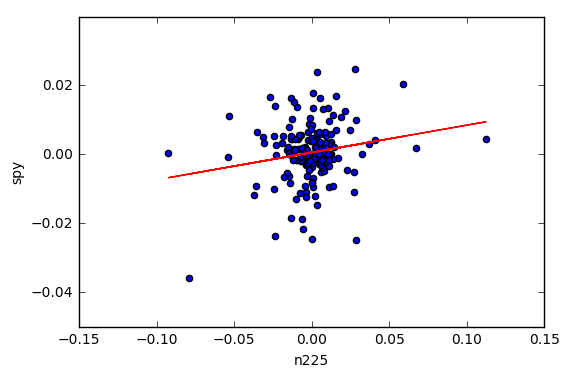

In [7]:
# 日経平均とS&P500の日次リターンの散布図を描画し直線をフィットさせる

# まずは日次リターンの計算
start_date = "2016-01-01"
end_date = "2016-12-31"
df = pd.DataFrame(index=pd.date_range(start_date, end_date))
symbols = ["n225", "spy"]
for symbol in symbols:
    df = df.join(pd.read_csv("%s.csv" % symbol, index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]))
    df = df.rename(columns={"Adj Close": symbol})
df = df / df.shift() - 1
df = df.dropna()

# そして散布図と直線をプロット
# この例の場合はあまり相関がなさそうなので直線を引くのは不適切かもしれませんが、
# 手法を紹介することが目的なので直線も引いてしまいます。
df.plot(kind="scatter", x="n225", y="spy")
beta, alpha = np.polyfit(df["n225"], df["spy"], 1)
plt.plot(df["n225"], beta * df["n225"] + alpha, '-', color='r')

# 相関係数も求めておく
print(df.corr())